<a href="https://colab.research.google.com/github/yunseo4401/start/blob/master/SGD_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
fish=pd.read_csv('http://bit.ly/fish_csv_data')

In [2]:
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [4]:
x=fish[['Weight','Length','Diagonal','Height']].to_numpy()
y=fish['Species'].to_numpy() #물고기 종을 예측 

from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target= train_test_split(x,y,random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)

In [8]:
from sklearn.linear_model import SGDClassifier
sc=SGDClassifier(loss='log',max_iter=10,random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))


0.8151260504201681
0.7


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [10]:
sc.partial_fit(train_scaled,train_target) #점진적 학습 진행 
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.7226890756302521
0.675


In [12]:
import numpy as np
sc=SGDClassifier(loss='log',random_state=42)
train_score=[]
test_score=[]
classes=np.unique(train_target) #train_target에 있는 7개 생선의 목록 생성 

for _ in range(0,300):
  sc.partial_fit(train_scaled,train_target,classes=classes)
  train_score.append(sc.score(train_scaled,train_target))
  test_score.append(sc.score(test_scaled,test_target))

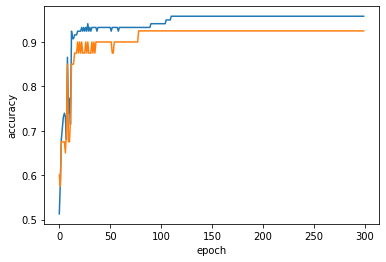

In [13]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')

plt.ylabel('accuracy')
plt.show()
#100번째 이후부터는 훈련데이터와 테스트 데이터의 점수가 조금씩 벌어지고 있음. 100번이 가장 적합 

In [14]:
sc=SGDClassifier(loss='log',max_iter=100,random_state=42,tol=None)
sc.fit(train_scaled, train_target)
#손실함수를 hinge로 바꾸면 SVM방식으로 분류 
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.9327731092436975
0.925
